# Watcha 분석

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os


# 파일관련 변수
DIR='./Data/Naver/'

# Matplotlib 한글 Fonts 설정
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path='../EXAM_PANDAS/Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [9]:
# DF에 YMD추가, YM그룹화 함수설정

def Year_Month(df1):
    df1_Date=df1['날짜'].str.split('-',expand=True)
    df1=pd.concat([df1_Date,df1],axis=1)
    df1.rename(columns={0:'Y',1:'M',2:'D'},inplace=True)
    df1_Group=df1.groupby(['Y','M'])
    return df1_Group

## 1. 장르별/성별 데이터

### 데이터 전처리

In [2]:
# 파일 불러오기
movie_f=pd.read_excel(DIR+'datalab_female_movie.xlsx',skiprows=6) # 영화_여자
movie_m=pd.read_excel(DIR+'datalab_male_movie.xlsx',skiprows=6)   # 영화_남자

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# DF정보, NaN 확인
movie_f.info(), movie_f.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1277 non-null   object 
 1   왓챠      1277 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


(None,
 날짜    0
 왓챠    0
 dtype: int64)

In [4]:
movie_m.info(), movie_m.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1277 non-null   object 
 1   왓챠      1277 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


(None,
 날짜    0
 왓챠    0
 dtype: int64)

In [47]:
movie_m

,날짜,왓챠
0,2019-01-01,71.25644
1,2019-01-02,40.62377
2,2019-01-03,38.65465
3,2019-01-04,46.80493
4,2019-01-05,65.74567
...,...,...
1272,2022-06-26,36.72071
1273,2022-06-27,26.18198
1274,2022-06-28,24.92809
1275,2022-06-29,28.48974


In [103]:
Year_Month(movie_m).mean()

왓챠
Y    M            
2019 01  49.025494
     02  50.352435
     03  44.518411
     04  39.557133
     05  37.310034
     06  39.696799
     07  44.266401
     08  51.088454
     09  55.487148
     10  46.849734
     11  45.626997
     12  51.282706
2020 01  53.908824
     02  40.286001
     03  25.126261
     04  18.809790
     05  18.481508
     06  23.175293
     07  27.284735
     08  31.871000
     09  23.489823
     10  26.832420
     11  23.536171
     12  16.019653
2021 01  13.897735
     02  18.036437
     03  15.903203
     04  16.321830
     05  19.487704
     06  22.013757
     07  26.918545
     08  28.450496
     09  25.993369
     10  22.387033
     11  25.591223
     12  22.211825
2022 01  23.065105
     02  22.347134
     03  21.535867
     04  25.501193
     05  26.417838
     06  31.238916

In [102]:
Year_Month(movie_m).sample()

,Y,M,D,날짜,왓챠
28,2019,01,29,2019-01-29,35.33923
32,2019,02,02,2019-02-02,65.06217
84,2019,03,26,2019-03-26,30.90234
95,2019,04,06,2019-04-06,64.97872
138,2019,05,19,2019-05-19,47.72017
177,2019,06,27,2019-06-27,36.36758
182,2019,07,02,2019-07-02,36.43655
235,2019,08,24,2019-08-24,63.95105
249,2019,09,07,2019-09-07,77.79831
285,2019,10,13,2019-10-13,44.94478


### 그래프 그리기

#### (1) 영화

In [10]:
# 비중 => 수치로 데이텨 변환
movie_ff=Year_Month(movie_f).mean()*155.6*0.572
movie_mm=Year_Month(movie_m).mean()*155.6*0.428

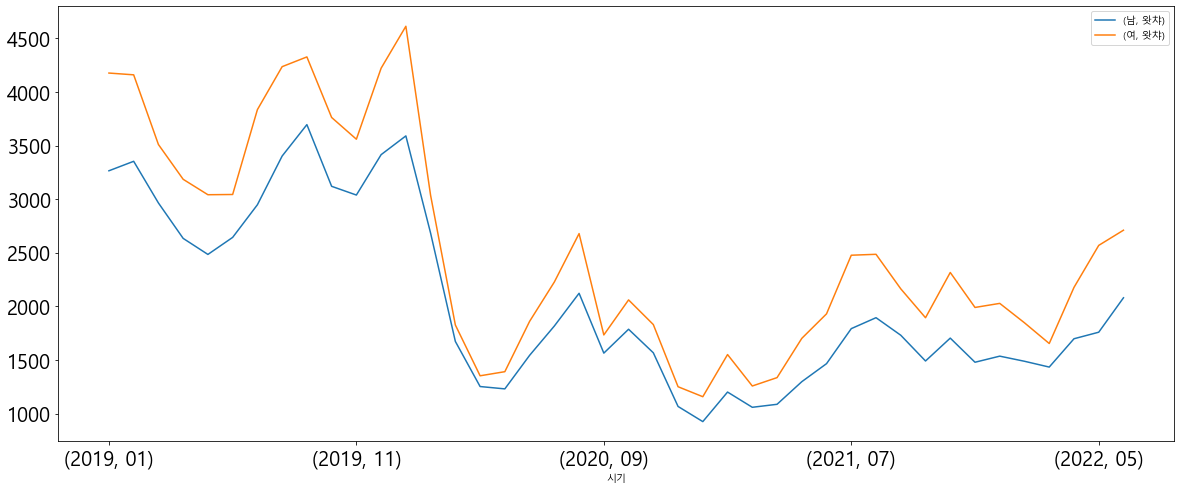

In [23]:
# 그래프
movie=pd.concat([movie_mm,movie_ff],keys=['남','여'],axis=1)
movie.plot(figsize=(20,8),xlabel='시기',fontsize=20).legend()

#### (2) 드라마

In [55]:
# 파일 불러오기
drama_f=pd.read_excel(DIR+'datalab_female_drama.xlsx',skiprows=6) 
drama_m=pd.read_excel(DIR+'datalab_male_drama.xlsx',skiprows=6) 

# DF정보, NaN 확인
drama_f.info(), drama_f.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1277 non-null   object 
 1   왓챠      1277 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(None,
 날짜    0
 왓챠    0
 dtype: int64)

In [25]:
# 비중 => 수치로 데이텨 변환
drama_ff=Year_Month(drama_f).mean()*90*0.644
drama_mm=Year_Month(drama_m).mean()*90*0.356

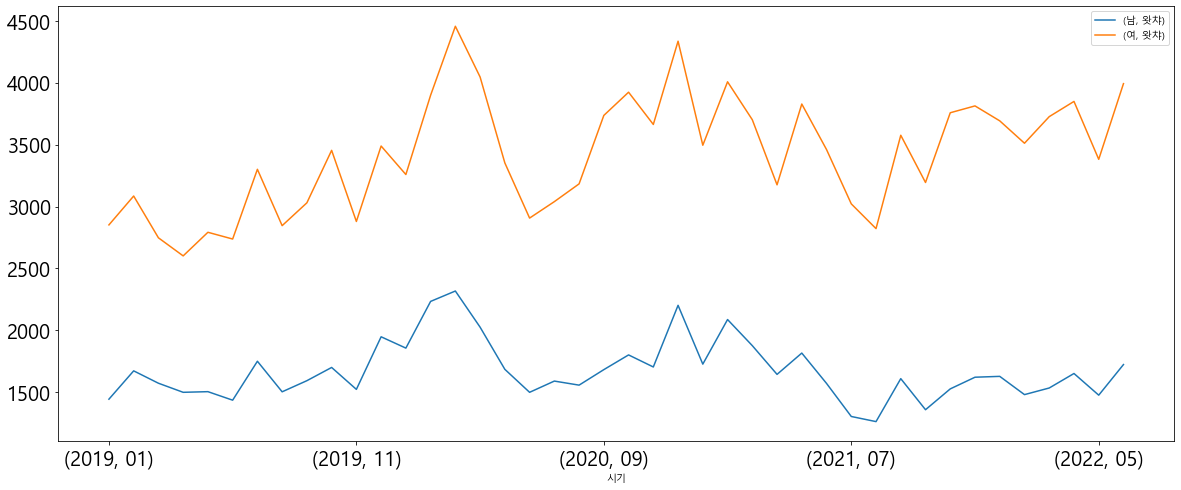

In [26]:
# 그래프
drama=pd.concat([drama_mm,drama_ff],keys=['남','여'],axis=1)
drama.plot(figsize=(20,8),xlabel='시기',fontsize=20).legend()

#### (3) 예능

In [56]:
# 파일 불러오기
ent_f=pd.read_excel(DIR+'datalab_female_ent.xlsx',skiprows=6) 
ent_m=pd.read_excel(DIR+'datalab_male_ent.xlsx',skiprows=6) 

# DF정보, NaN 확인
ent_f.info(), ent_f.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1277 non-null   object 
 1   왓챠      1277 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(None,
 날짜    0
 왓챠    0
 dtype: int64)

In [29]:
# 비중 => 수치로 데이텨 변환
ent_ff=Year_Month(ent_f).mean()*24*0.6
ent_mm=Year_Month(ent_m).mean()*24*0.4

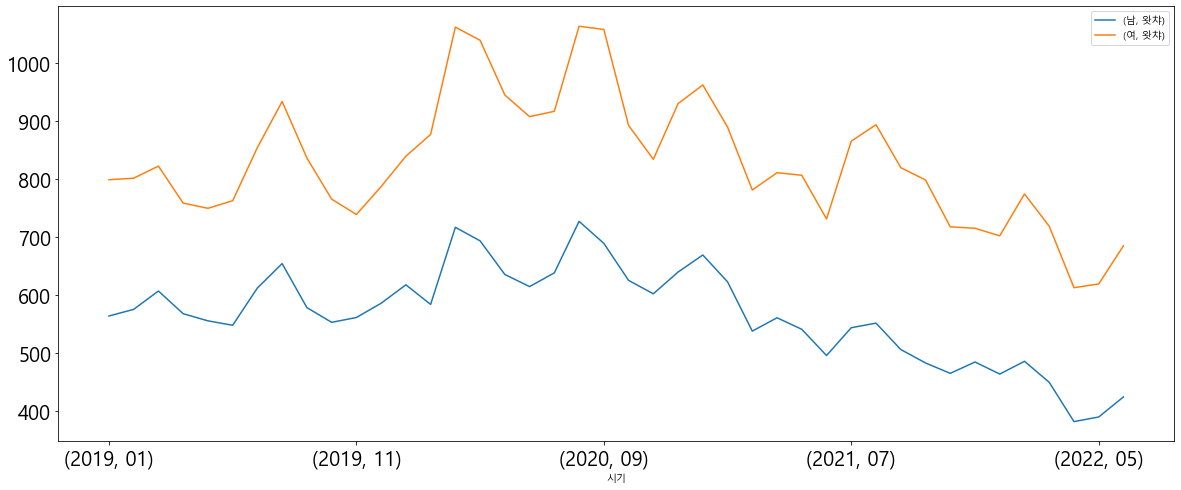

In [34]:
# 그래프
ent=pd.concat([ent_mm,ent_ff],keys=['남','여'],axis=1)
ent.plot(figsize=(20,8),xlabel='시기',fontsize=20).legend()

#### (4) 애니메이션

In [57]:
# 파일 불러오기
ani_f=pd.read_excel(DIR+'datalab_female_animation.xlsx',skiprows=6) 
ani_m=pd.read_excel(DIR+'datalab_male_animation.xlsx',skiprows=6) 

# DF정보, NaN 확인
ani_f.info(), ani_f.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1277 non-null   object 
 1   왓챠      1277 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


(None,
 날짜    0
 왓챠    0
 dtype: int64)

In [32]:
# 비중 => 수치로 데이텨 변환
ani_ff=Year_Month(ani_f).mean()*22.6*0.72
ani_mm=Year_Month(ani_m).mean()*22.6*0.28

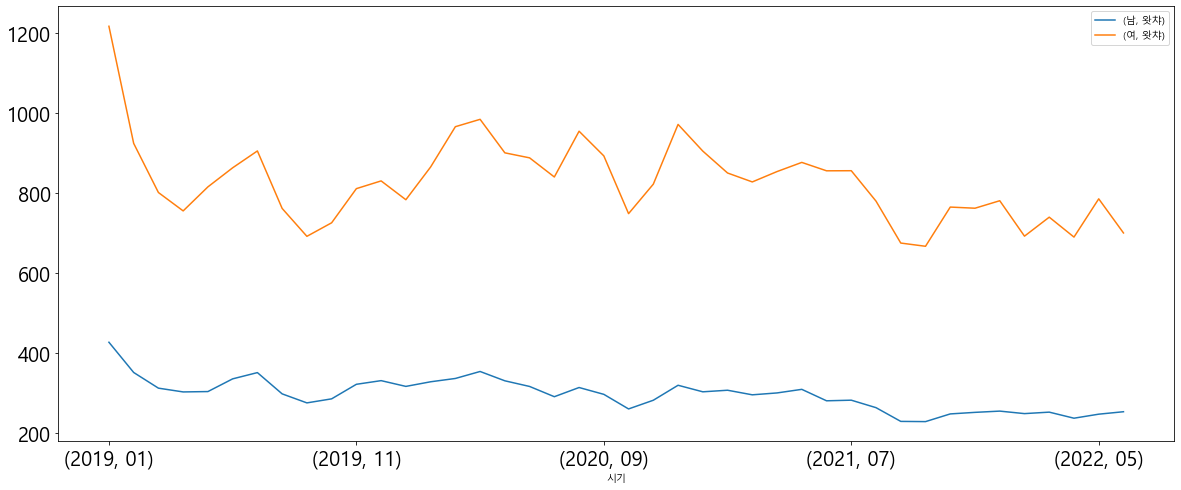

In [35]:
# 그래프
ani=pd.concat([ani_mm,ani_ff],keys=['남','여'],axis=1)
ani.plot(figsize=(20,8),xlabel='시기',fontsize=20).legend()

#### (5) 장르별 남자

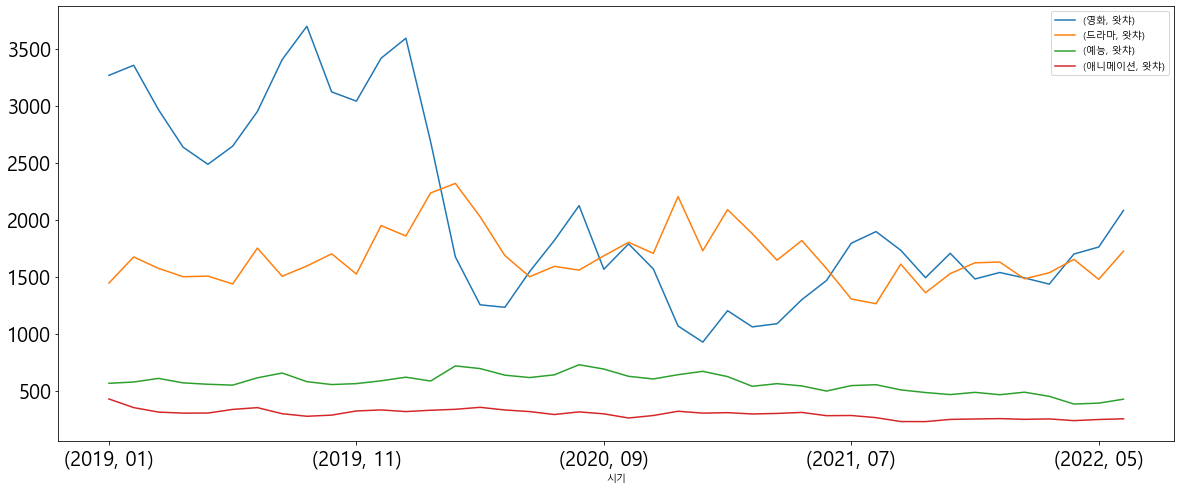

In [37]:
# 장르모음
all_m=pd.concat([movie_mm,drama_mm,ent_mm,ani_mm],keys=['영화','드라마','예능','애니메이션'],axis=1)
all_m.plot(figsize=(20,8),xlabel='시기',fontsize=20).legend()

#### (6) 장르별 여자

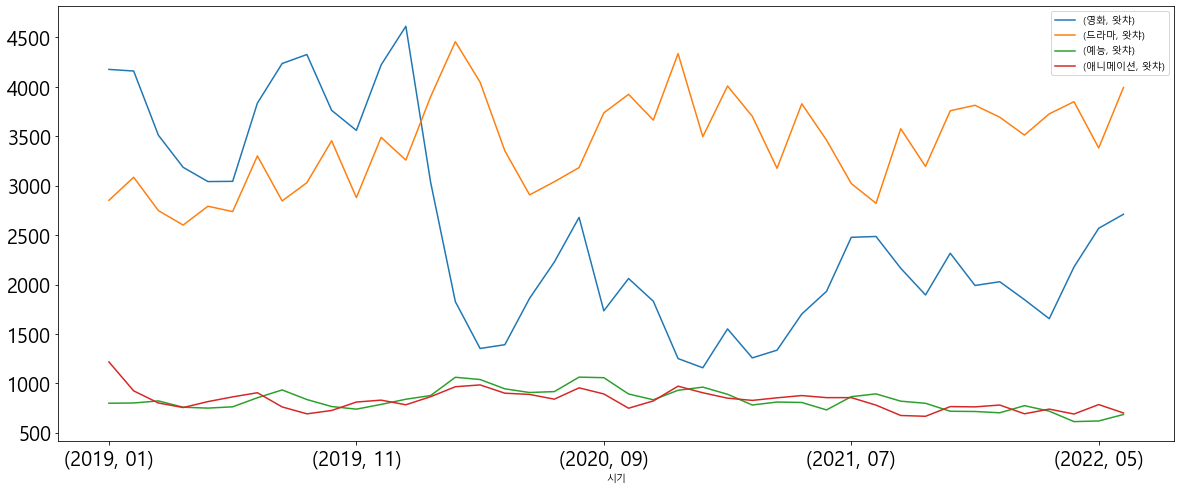

In [39]:
all_f=pd.concat([movie_ff,drama_ff,ent_ff,ani_ff],keys=['영화','드라마','예능','애니메이션'],axis=1)
all_f.plot(figsize=(20,8),xlabel='시기',fontsize=20).legend()

## 2. 연령대별 플랫폼 이용 추이 데이터

#### (1) 파일 불러오기

In [42]:
files=os.listdir(DIR+'연령별/')
file_list=[]
for i in files:
    file=pd.read_excel(DIR+'연령별/'+i,skiprows=6)
    file_list.append(file)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains

In [72]:
# 연령대별 데이터를 각각의 변수에 저장
Year_Month_file=[]
for i in range(6):
    Year_Month_file.append(Year_Month(file_list[i]).mean())
    
# NaN 확인
print(f'18:\n{age_18.isnull().sum()}')
print(f'20:\n{age_20.isnull().sum()}')
print(f'30:\n{age_30.isnull().sum()}')
print(f'40:\n{age_40.isnull().sum()}')
print(f'50:\n{age_50.isnull().sum()}')

18:
왓챠    0
dtype: int64
20:
왓챠    0
dtype: int64
30:
왓챠    0
dtype: int64
40:
왓챠    0
dtype: int64
50:
왓챠    0
dtype: int64


#### 비중 => 수치로 데이텨 변환

In [44]:
age_18=Year_Month_file[0]*24480*0.14
age_20=Year_Month_file[1]*24480*0.379
age_30=Year_Month_file[2]*24480*0.269
age_40=Year_Month_file[3]*24480*0.149
age_50=((Year_Month_file[4]+Year_Month_file[5])/2)*24480*0.06

#### 그래프 그리기

<AxesSubplot:title={'center':'연령별 검색량'}, xlabel='시기'>

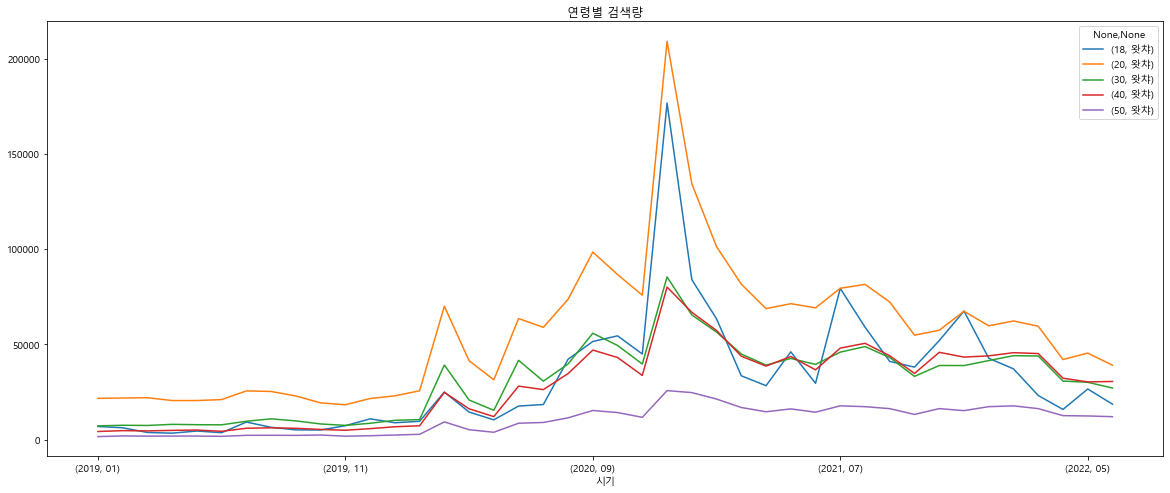

In [46]:
age_all=pd.concat([age_18,age_20,age_30,age_40,age_50],axis=1,
                  keys=['18','20','30','40','50'])
age_all.plot(figsize=(20,8),title='연령별 검색량',xlabel='시기')

## 3. 분석 결과


### - 전체적으로 7~8월, 12월에 검색량이 많음 
#### ------------> 휴일 또는 휴가철에 검색량이 증가하는것으로 보임
### - 영화를 제외한 전체 장르에서 여성의 검색량이 높게 나타남
####  ------------> 남성 고객층 확보를 위한 노력 필요
### - 여성의 경우 드라마와 영화의 검색량이 상반되는 모습을 보임
####  ------------> 균형적인 컨텐츠 확보 필요
### - 2020년 3월 왓챠가 무료이용권을 제공하며 관심도 크게증가
#### ------------> 특히 10대, 20대에서 큰 폭으로 증가후 큰 으로 감소
#### ------------> 구매력이 낮은 학생층이 많아 크게 유입된 것으로 보임
#### ------------> 지속적인 프로모션 필요
### - 50대 이상의 검색량이 상대적, 절대적으로 낮음
#### ------------> 중장년층을 겨냥한 컨텐츠의 확보 또는 홍보가 필요


